In [2]:
def calc_mean(hist):
    
    # 最大値のbinのインデックスを取得
    max_bin = hist.GetMaximumBin()

    # 最大値のbinの中心値を取得
    max_bin_center = hist.GetBinCenter(max_bin)

    # 周囲5つのbinを使用して重み付け平均を計算
    weighted_sum = 0
    weight_total = 0
    for i in range(-2, 3):  # 最大値のbinの周囲5つを考慮
        bin_idx = max_bin + i
        if bin_idx > 0 and bin_idx <= hist.GetNbinsX():  # bin範囲のチェック
            bin_center = hist.GetBinCenter(bin_idx)
            bin_content = hist.GetBinContent(bin_idx)
            weighted_sum += bin_center * bin_content
            weight_total += bin_content

    # 重み付け平均を計算
    if weight_total > 0:
        weighted_mean = weighted_sum / weight_total
    else:
        weighted_mean = None  # カウントが全くない場合
    return weighted_mean


def calc_mean_right(hist):
    hist.GetXaxis().SetRangeUser(-250,3000)
    # 最大値のbinのインデックスを取得
    max_bin = hist.GetMaximumBin()
    
    hist.GetXaxis().SetRangeUser(-4600,4600)

    # 周囲5つのbinを使用して重み付け平均を計算
    weighted_sum = 0
    weight_total = 0
    for i in range(-2, 3):  # 最大値のbinの周囲5つを考慮
        bin_idx = max_bin + i
        if bin_idx > 0 and bin_idx <= hist.GetNbinsX():  # bin範囲のチェック
            bin_center = hist.GetBinCenter(bin_idx)
            bin_content = hist.GetBinContent(bin_idx)
            weighted_sum += bin_center * bin_content
            weight_total += bin_content

    # 重み付け平均を計算
    if weight_total > 0:
        weighted_mean = weighted_sum / weight_total
    else:
        weighted_mean = None  # カウントが全くない場合
    return weighted_mean

def calc_mean_left(hist):
    hist.GetXaxis().SetRangeUser(-4000,-250)
    # 最大値のbinのインデックスを取得
    max_bin = hist.GetMaximumBin()
    
    hist.GetXaxis().SetRangeUser(-4600,4600)

    # 周囲5つのbinを使用して重み付け平均を計算
    weighted_sum = 0
    weight_total = 0
    for i in range(-2, 3):  # 最大値のbinの周囲5つを考慮
        bin_idx = max_bin + i
        if bin_idx > 0 and bin_idx <= hist.GetNbinsX():  # bin範囲のチェック
            bin_center = hist.GetBinCenter(bin_idx)
            bin_content = hist.GetBinContent(bin_idx)
            weighted_sum += bin_center * bin_content
            weight_total += bin_content

    # 重み付け平均を計算
    if weight_total > 0:
        weighted_mean = weighted_sum / weight_total
    else:
        weighted_mean = None  # カウントが全くない場合
    return weighted_mean

Welcome to JupyROOT 6.28/06
163.11789320949728 -1125.108429522782 1136.8713318877935 56909
860.4712204676196 427.9264423581449 961.0055990067558 84266
1381.8922236801816 -342.66215807202053 1423.7427690570835 66595
-84.22899293358567 1060.0385643079635 1063.3796504873949 99098
1
2
3
4


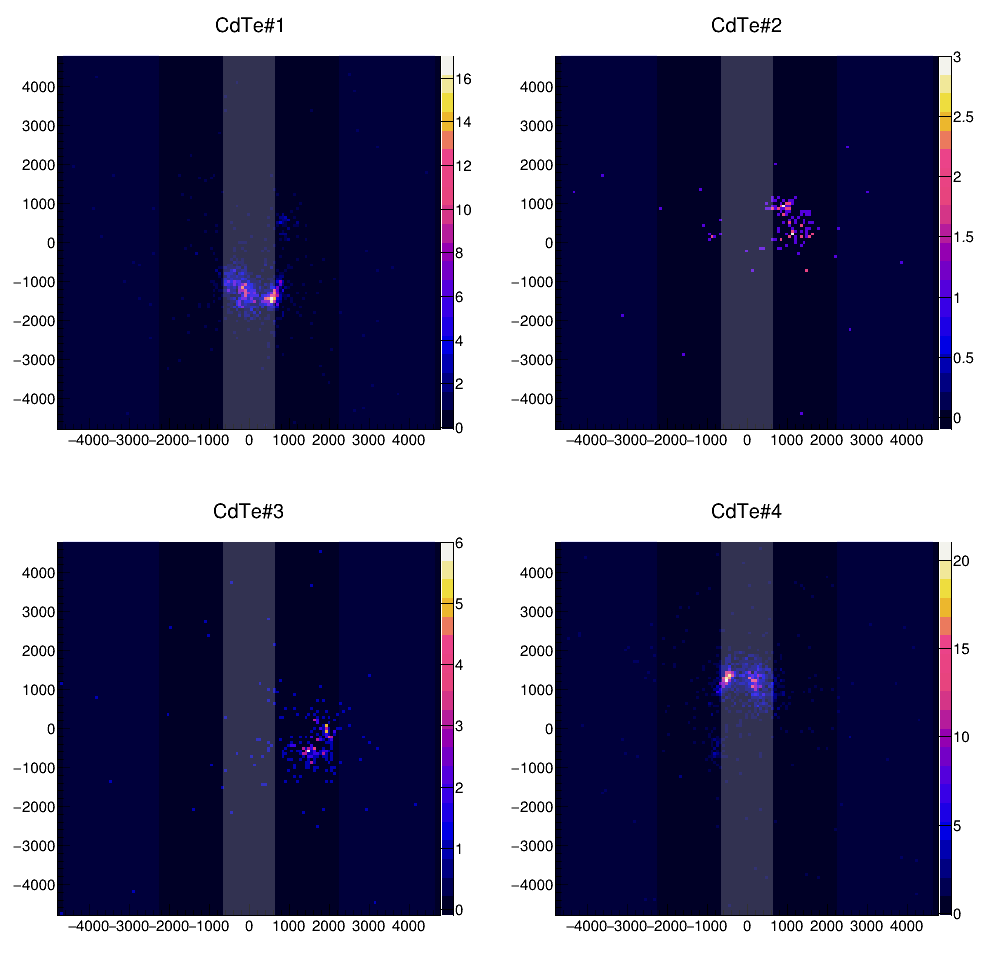

In [3]:
import ROOT
from datetime import datetime, timedelta

%jsroot off
import numpy as np

file1 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(1)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(2)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file3 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(3)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file4 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(4)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file5 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")


ROOT.gStyle.SetOptStat(0)
tree1 = file1.Get("eventtree")
tree2 = file2.Get("eventtree")
tree3 = file3.Get("eventtree")
tree4 = file4.Get("eventtree")
tree5 = file5.Get("eventtree")

legends = ["CdTe#1","CdTe#2","CdTe#3","CdTe#4","CMOS#2"]

# 半透明の四角形(TBox)を作成
box1 = ROOT.TBox(-660,-4800,660,4800)
box1.SetFillColorAlpha(ROOT.kWhite, 0.2)  # 色と透明度を設定 (0.0から1.0の範囲)
box2 = ROOT.TBox(660,-4800,660+1600,4800)
box2.SetFillColorAlpha(ROOT.kBlack, 0.0)  # 色と透明度を設定 (0.0から1.0の範囲)
box21 = ROOT.TBox(-660-1600,-4800,-660,4800)
box21.SetFillColorAlpha(ROOT.kBlack, 0.0)  # 色と透明度を設定 (0.0から1.0の範囲)
box3 = ROOT.TBox(660+1600,-4800,660+1600+2400,4800)
box3.SetFillColorAlpha(ROOT.kBlue, 0.1)  # 色と透明度を設定 (0.0から1.0の範囲)
box31 = ROOT.TBox(-660-1600-2400,-4800,-660-1600,4800)
box31.SetFillColorAlpha(ROOT.kBlue, 0.1)  # 色と透明度を設定 (0.0から1.0の範囲)

boxes=[box1,box2,box21,box3,box31]


counter=0

trees=[tree1,tree2,tree3,tree4,tree5]
trees=[tree1,tree2,tree3,tree4]
# Create a canvas to draw the histograms
canvas = ROOT.TCanvas("canvas", "canvas", 1000, 1000)
canvas.Divide(2,2)


# ISO 8601形式の文字列
date_string = "2024-04-17T22:14:39.6"

# 文字列をdatetimeオブジェクトに変換
date_object = datetime.fromisoformat(date_string)


hists=[]

import ROOT



for i in range(len(trees)):
    hist_name="image_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH2D(hist_name, legends[i] ,400,-4800,4800,400,-4800,4800))
    
cond="approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<320 "
cond="approx_passed_time_from_launch_sec+  887.5-886.2>330&&approx_passed_time_from_launch_sec+  887.5-886.2<370 "
cond="approx_passed_time_from_launch_sec+  887.5-886.2>400&&approx_passed_time_from_launch_sec+  887.5-886.2<430 "

for i,tree in enumerate(trees):
    hist_name="image_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(4)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, cond, "colz")
    else:
        canvas.cd(i+1)
        # tree.Draw(f"det_rot_y_um: det_rot_x_um>>"+hist_name, cond, "colz")
        tree.Draw(f"det_y_um: det_x_um>>"+hist_name, cond, "colz")

    dx=hists[i].GetMean(1)
    dy = hists[i].GetMean(2)
    print(dx,dy,np.sqrt(dx**2+dy**2),hists[i].GetMaximumBin())
    

ROOT.gStyle.SetPalette(ROOT.kBlueRedYellow);
ROOT.gStyle.SetPalette(62)

counter=0
histall=hists[0].Clone()
for i in range(3):
    histall.Add(hists[i+1])

for hist in hists:
    draw_option="colz"
    #hist.Scale(1/200)
    canvas.cd(counter+1)
    hist.Draw(draw_option)
    hist.SetMinimum(-0.1)
    hist.Rebin2D(3,3)
    for box in boxes:
        box.Draw("same")

    # パレット軸オブジェクトの取得
    canvas.Draw()
    palette = hist.GetListOfFunctions().FindObject("palette")
    if palette:
        # 現在のNDC座標を取得
        x1 = palette.GetX1NDC()
        x2 = palette.GetX2NDC()
        width = x2 - x1

        # 幅を半分に設定
        palette.SetX2NDC(x1 + width / 2.0)

        # 変更内容を反映
        canvas.Modified()
        canvas.Update()
        
    counter+=1
    print(counter)
    if(counter>=4):
        break


canvas.Draw()




416.3187250996016
635.5744680851063
67.2601880877743
515.186295503212
1387.843717001056
1176.6666666666667
1694.7891891891893
1214.313253012048


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


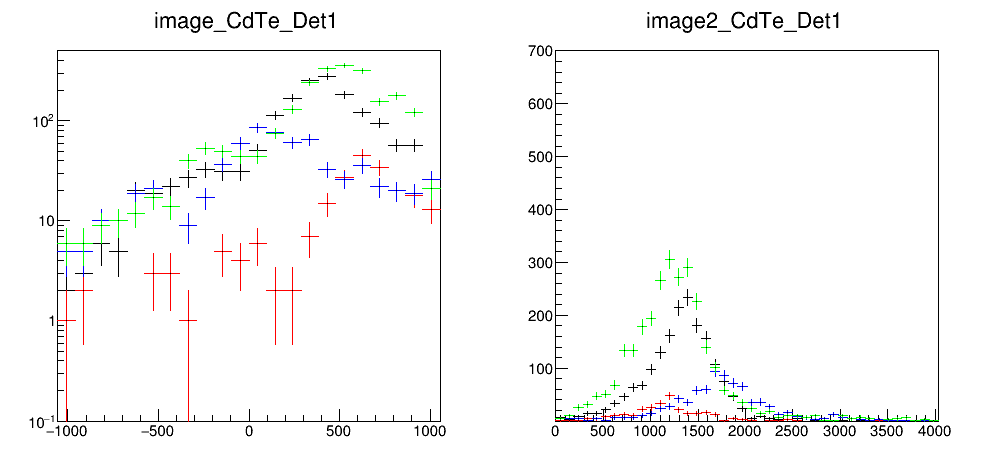

In [122]:
import ROOT
from datetime import datetime, timedelta

%jsroot off
import numpy as np

file1 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(1)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(2)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file3 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(3)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file4 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(4)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file5 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")


ROOT.gStyle.SetOptStat(0)
tree1 = file1.Get("eventtree")
tree2 = file2.Get("eventtree")
tree3 = file3.Get("eventtree")
tree4 = file4.Get("eventtree")
tree5 = file5.Get("eventtree")

legends = ["CdTe Det1","CdTe Det2","CdTe Det3","CdTe Det4"]
colors=[ROOT.kBlack,ROOT.kRed, ROOT.kBlue, ROOT.kGreen]
    
counter=0

trees=[tree1,tree2,tree3,tree4,tree5]
trees=[tree1,tree2,tree3,tree4]
# Create a canvas to draw the histograms
canvas = ROOT.TCanvas("canvas", "canvas",1000,500)
canvas.Divide(2)


# ISO 8601形式の文字列
date_string = "2024-04-17T22:14:39.6"

# 文字列をdatetimeオブジェクトに変換
date_object = datetime.fromisoformat(date_string)


hists=[]




for i in range(len(trees)):
    hist_name="image_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name ,100,-4800,4800))
    
    
duration_name=  "T1_posxposy_CdTe1to4" 
cond="approx_passed_time_from_launch_sec+  887.5-886.2>100&&approx_passed_time_from_launch_sec+  887.5-886.2<130"

for i,tree in enumerate(trees):
    hist_name="image_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330", "colz")
    elif(i==0):
        canvas.cd(1)
        tree.Draw(f"det_rot_x_um>>"+hist_name, cond, "E")
    else:
        canvas.cd(1)
        tree.Draw(f"det_rot_x_um>>"+hist_name, cond, "Esame")




for i in range(len(trees)):
    hist_name="image2_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name ,100,-4800,4800))
    
for i,tree in enumerate(trees):
    hist_name="image2_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<30", "colz")
    elif(i==0):
        canvas.cd(2)
        tree.Draw(f"det_rot_y_um>>"+hist_name, cond, "E")
    else:
        canvas.cd(2)
        tree.Draw(f"det_rot_y_um>>"+hist_name, cond, "Esame")


hist_pos= ROOT.TH1D(duration_name,"",8,0.5,8.5)
 

counter=0

# histall=hists[0].Clone()
# for i in range(3):
#     histall.Add(hists[i+1])
    
for hist in hists[:4]:
    draw_option="E"
    #hist.Scale(1/200)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+1, calc_mean(hist))
    if(counter==0):
        draw_option="E"
        hist.GetXaxis().SetRangeUser(-1000,1000)
        hist.GetYaxis().SetRangeUser(0.1,500)
    else:
        draw_option="Esame"
    canvas.cd(1).SetLogy(1)

    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    counter+=1
    if(counter>=4):
        break

counter=0

for hist in hists[4:]:
    draw_option="E"
    #hist.Scale(1/200)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+2, calc_mean(hist))
    if(counter==0):
        draw_option="E"
        hist.GetXaxis().SetRangeUser(0,4000)
        hist.GetYaxis().SetRangeUser(0.1,700)

    else:
        draw_option="Esame"
    canvas.cd(2).SetLogy(0)

    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    counter+=1
    if(counter>=4):
        break

canvas.Draw()

fout=  ROOT.TFile(duration_name+".root","recreate")
hist_pos.Write()
fout.Close()


-4260.410022779043
-3919.4754098360654
-4560.0
-4249.003802281369
-1372.6896551724137
-1228.6315789473683
-822.7878787878788
-1204.1739130434783


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


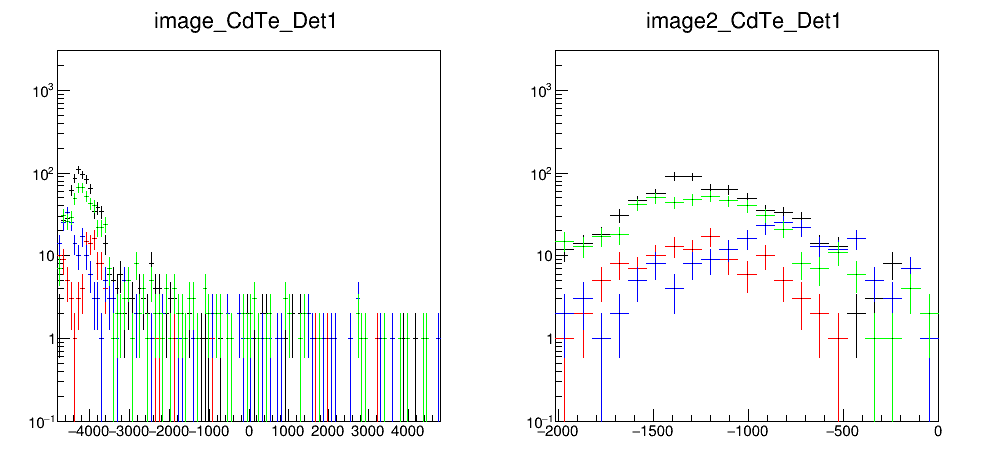

In [113]:
import ROOT
from datetime import datetime, timedelta

%jsroot off
import numpy as np

file1 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(1)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(2)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file3 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(3)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file4 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(4)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file5 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")


ROOT.gStyle.SetOptStat(0)
tree1 = file1.Get("eventtree")
tree2 = file2.Get("eventtree")
tree3 = file3.Get("eventtree")
tree4 = file4.Get("eventtree")
tree5 = file5.Get("eventtree")

legends = ["CdTe Det1","CdTe Det2","CdTe Det3","CdTe Det4"]
colors=[ROOT.kBlack,ROOT.kRed, ROOT.kBlue, ROOT.kGreen]
    
counter=0

trees=[tree1,tree2,tree3,tree4,tree5]
trees=[tree1,tree2,tree3,tree4]
# Create a canvas to draw the histograms
canvas = ROOT.TCanvas("canvas", "canvas",1000,500)
canvas.Divide(2)


# ISO 8601形式の文字列
date_string = "2024-04-17T22:14:39.6"

# 文字列をdatetimeオブジェクトに変換
date_object = datetime.fromisoformat(date_string)


hists=[]




for i in range(len(trees)):
    hist_name="image_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name ,100,-4800,4800))
    
    
duration_name=  "T2_posxposy_CdTe1to4" 
cond="approx_passed_time_from_launch_sec+  887.5-886.2>330&&approx_passed_time_from_launch_sec+  887.5-886.2<370 "

for i,tree in enumerate(trees):
    hist_name="image_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330", "colz")
    elif(i==0):
        canvas.cd(1)
        tree.Draw(f"det_rot_x_um>>"+hist_name, cond, "E")
    else:
        canvas.cd(1)
        tree.Draw(f"det_rot_x_um>>"+hist_name, cond, "Esame")




for i in range(len(trees)):
    hist_name="image2_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name ,100,-4800,4800))
    
for i,tree in enumerate(trees):
    hist_name="image2_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330", "colz")
    elif(i==0):
        canvas.cd(2)
        tree.Draw(f"det_rot_y_um>>"+hist_name, cond, "E")
    else:
        canvas.cd(2)
        tree.Draw(f"det_rot_y_um>>"+hist_name, cond, "Esame")


hist_pos= ROOT.TH1D(duration_name,"",8,0.5,8.5)
 

counter=0

# histall=hists[0].Clone()
# for i in range(3):
#     histall.Add(hists[i+1])
    
for hist in hists[:4]:
    draw_option="E"
    #hist.Scale(1/200)
    if(counter==0):
        draw_option="E"
        #hist.GetXaxis().SetRangeUser(-1000,1000)
        hist.GetYaxis().SetRangeUser(0.1,3000)
    else:
        draw_option="Esame"
    canvas.cd(1).SetLogy(1)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+1, calc_mean(hist))
    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    counter+=1
    if(counter>=4):
        break

counter=0

for hist in hists[4:]:
    draw_option="E"
    #hist.Scale(1/200)
    if(counter==0):
        draw_option="E"
        hist.GetXaxis().SetRangeUser(-2000,0)
        hist.GetYaxis().SetRangeUser(0.1,3000)

    else:
        draw_option="Esame"
    canvas.cd(2).SetLogy(1)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+2, calc_mean(hist))
    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    counter+=1
    if(counter>=4):
        break

canvas.Draw()

fout=  ROOT.TFile(duration_name+".root","recreate")
hist_pos.Write()
fout.Close()



134.5084745762712
-342.54545454545456
-246.6206896551724
-518.9156010230179
134.5084745762712 -620.5524861878453
343.2 -342.54545454545456
-246.6206896551724 -246.6206896551724
175.4441687344913 -518.9156010230179
1378.6171003717473
1148.6896551724137
1685.9469026548672
1219.668292682927


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: T3_posxposy_CdTe1to4 (Potential memory leak).


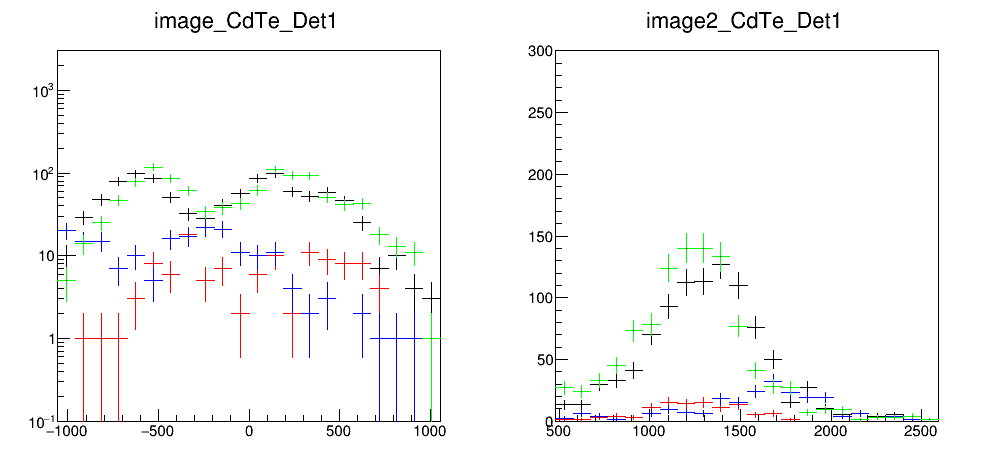

In [114]:
import ROOT
from datetime import datetime, timedelta

%jsroot off
import numpy as np

file1 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(1)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(2)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file3 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(3)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file4 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(4)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file5 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")


ROOT.gStyle.SetOptStat(0)
tree1 = file1.Get("eventtree")
tree2 = file2.Get("eventtree")
tree3 = file3.Get("eventtree")
tree4 = file4.Get("eventtree")
tree5 = file5.Get("eventtree")

legends = ["CdTe Det1","CdTe Det2","CdTe Det3","CdTe Det4"]
colors=[ROOT.kBlack,ROOT.kRed, ROOT.kBlue, ROOT.kGreen]
    
counter=0

trees=[tree1,tree2,tree3,tree4,tree5]
trees=[tree1,tree2,tree3,tree4]
# Create a canvas to draw the histograms
canvas = ROOT.TCanvas("canvas", "canvas",1000,500)
canvas.Divide(2)


# ISO 8601形式の文字列
date_string = "2024-04-17T22:14:39.6"

# 文字列をdatetimeオブジェクトに変換
date_object = datetime.fromisoformat(date_string)


hists=[]




for i in range(len(trees)):
    hist_name="image_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name ,100,-4800,4800))
    
    
duration_name=  "T3_posxposy_CdTe1to4" 
cond="approx_passed_time_from_launch_sec+  887.5-886.2>400&&approx_passed_time_from_launch_sec+  887.5-886.2<428"

for i,tree in enumerate(trees):
    hist_name="image_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330", "colz")
    elif(i==0):
        canvas.cd(1)
        tree.Draw(f"det_rot_x_um>>"+hist_name, cond, "E")
    else:
        canvas.cd(1)
        tree.Draw(f"det_rot_x_um>>"+hist_name, cond, "Esame")




for i in range(len(trees)):
    hist_name="image2_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name ,100,-4800,4800))
    
for i,tree in enumerate(trees):
    hist_name="image2_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330", "colz")
    elif(i==0):
        canvas.cd(2)
        tree.Draw(f"det_rot_y_um>>"+hist_name, cond, "E")
    else:
        canvas.cd(2)
        tree.Draw(f"det_rot_y_um>>"+hist_name, cond, "Esame")


hist_pos= ROOT.TH1D(duration_name,"",8,0.5,8.5)
 

counter=0

# histall=hists[0].Clone()
# for i in range(3):
#     histall.Add(hists[i+1])
    
for hist in hists[:4]:
    draw_option="E"
    #hist.Scale(1/200)
    if(counter==0):
        draw_option="E"
        hist.GetXaxis().SetRangeUser(-1000,1000)
        hist.GetYaxis().SetRangeUser(0.1,300)
    else:
        draw_option="Esame"
    canvas.cd(1).SetLogy(0)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+1, calc_mean(hist))
    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    counter+=1
    if(counter>=4):
        break

counter=0

hist_pos= ROOT.TH1D(duration_name,"",8,0.5,8.5)
 

counter=0

# histall=hists[0].Clone()
# for i in range(3):
#     histall.Add(hists[i+1])
    
for hist in hists[:4]:
    draw_option="E"
    #hist.Scale(1/200)
    print(calc_mean_right(hist),calc_mean_left(hist))
    hist_pos.SetBinContent(2*counter+1, calc_mean_right(hist))
    if(counter==0):
        draw_option="E"
        hist.GetXaxis().SetRangeUser(-1000,1000)
        hist.GetYaxis().SetRangeUser(0.1,3000)
    else:
        draw_option="Esame"
    canvas.cd(1).SetLogy(1)

    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    counter+=1
    if(counter>=4):
        break

counter=0

for hist in hists[4:]:
    draw_option="E"
    #hist.Scale(1/200)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+2, calc_mean_right(hist))
    if(counter==0):
        draw_option="E"
        hist.GetXaxis().SetRangeUser(500,2500)
        hist.GetYaxis().SetRangeUser(0,300)

    else:
        draw_option="Esame"
    canvas.cd(2).SetLogy(0)
    
    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    counter+=1
    if(counter>=4):
        break

canvas.Draw()

fout=  ROOT.TFile(duration_name+".root","recreate")
hist_pos.Write()
fout.Close()


-2.556097560975631
1.7290322580644977
2.631016042780727
2.0934939759035927
2.0692913385826563
1.7599999999999798
2.3770334928229446
-2.514606741573056


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


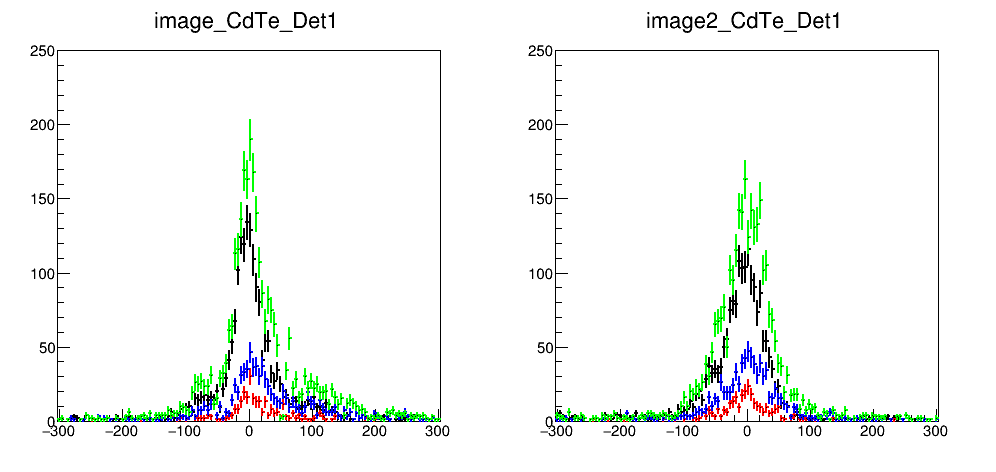

In [40]:
import ROOT
from datetime import datetime, timedelta

%jsroot off
import numpy as np

file1 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(1)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(2)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file3 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(3)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file4 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(4)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file5 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")


ROOT.gStyle.SetOptStat(0)
tree1 = file1.Get("eventtree")
tree2 = file2.Get("eventtree")
tree3 = file3.Get("eventtree")
tree4 = file4.Get("eventtree")
tree5 = file5.Get("eventtree")

legends = ["CdTe Det1","CdTe Det2","CdTe Det3","CdTe Det4"]
colors=[ROOT.kBlack,ROOT.kRed, ROOT.kBlue, ROOT.kGreen]
    
counter=0

trees=[tree1,tree2,tree3,tree4,tree5]
trees=[tree1,tree2,tree3,tree4]
# Create a canvas to draw the histograms
canvas = ROOT.TCanvas("canvas", "canvas",1000,500)
canvas.Divide(2)


# ISO 8601形式の文字列
date_string = "2024-04-17T22:14:39.6"

# 文字列をdatetimeオブジェクトに変換
date_object = datetime.fromisoformat(date_string)


hists=[]




for i in range(len(trees)):
    hist_name="image_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name ,200,-480,480))
    
    
duration_name=  "T1_posxposy_CdTe1to4" 
cond="approx_passed_time_from_launch_sec+  887.5-886.2>100&&approx_passed_time_from_launch_sec+  887.5-886.2<130"

for i,tree in enumerate(trees):
    hist_name="image_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330", "colz")
    elif(i==0):
        canvas.cd(1)
        tree.Draw(f"det_rot_x_arcsec>>"+hist_name, cond, "E")
    else:
        canvas.cd(1)
        tree.Draw(f"det_rot_x_arcsec>>"+hist_name, cond, "Esame")




for i in range(len(trees)):
    hist_name="image2_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name ,200,-480,480))
    
for i,tree in enumerate(trees):
    hist_name="image2_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<30", "colz")
    elif(i==0):
        canvas.cd(2)
        tree.Draw(f"det_rot_y_arcsec>>"+hist_name, cond, "E")
    else:
        canvas.cd(2)
        tree.Draw(f"det_rot_y_arcsec>>"+hist_name, cond, "Esame")


hist_pos= ROOT.TH1D(duration_name,"",8,0.5,8.5)
 

counter=0

# histall=hists[0].Clone()
# for i in range(3):
#     histall.Add(hists[i+1])
    
for hist in hists[:4]:
    draw_option="E"
    #hist.Scale(1/200)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+1, calc_mean(hist))
    if(counter==0):
        draw_option="E"
        hist.GetXaxis().SetRangeUser(-300,300)
        hist.GetYaxis().SetRangeUser(0,250)
    else:
        draw_option="Esame"
    canvas.cd(1).SetLogy(0)

    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    hist.SetLineWidth(2)
    counter+=1
    if(counter>=4):
        break

counter=0

for hist in hists[4:]:
    draw_option="E"
    #hist.Scale(1/200)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+2, calc_mean(hist))
    if(counter==0):
        draw_option="E"
        hist.GetXaxis().SetRangeUser(-300,300)
        hist.GetYaxis().SetRangeUser(0,250)

    else:
        draw_option="Esame"
    canvas.cd(2).SetLogy(0)
    hist.SetLineWidth(2)
    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    counter+=1
    if(counter>=4):
        break

canvas.Draw()


-103.15061728395062
-100.01454545454546
-29.561904761904792
-103.16775431861807
-1.0500000000000238
8.399999999999979
-3.701204819277133
3.625174825174803


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


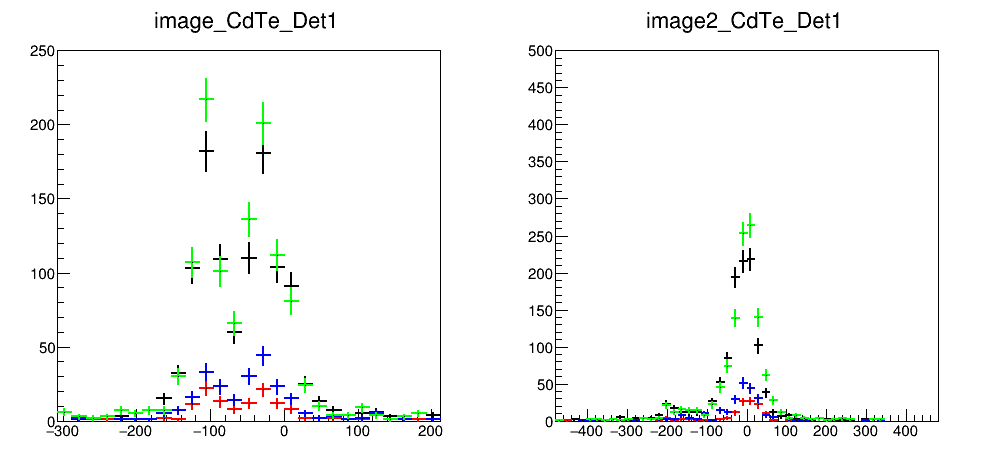

In [27]:
import ROOT
from datetime import datetime, timedelta

%jsroot off
import numpy as np

file1 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(1)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(2)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file3 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(3)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file4 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(4)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file5 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")


ROOT.gStyle.SetOptStat(0)
tree1 = file1.Get("eventtree")
tree2 = file2.Get("eventtree")
tree3 = file3.Get("eventtree")
tree4 = file4.Get("eventtree")
tree5 = file5.Get("eventtree")

legends = ["CdTe Det1","CdTe Det2","CdTe Det3","CdTe Det4"]
colors=[ROOT.kBlack,ROOT.kRed, ROOT.kBlue, ROOT.kGreen]
    
counter=0

trees=[tree1,tree2,tree3,tree4,tree5]
trees=[tree1,tree2,tree3,tree4]
# Create a canvas to draw the histograms
canvas = ROOT.TCanvas("canvas", "canvas",1000,500)
canvas.Divide(2)


# ISO 8601形式の文字列
date_string = "2024-04-17T22:14:39.6"

# 文字列をdatetimeオブジェクトに変換
date_object = datetime.fromisoformat(date_string)


hists=[]




for i in range(len(trees)):
    hist_name="image_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name ,50,-480,480))
    
    
duration_name=  "T1_posxposy_CdTe1to4" 
cond="approx_passed_time_from_launch_sec+  887.5-886.2>400&&approx_passed_time_from_launch_sec+  887.5-886.2<428"

for i,tree in enumerate(trees):
    hist_name="image_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330", "colz")
    elif(i==0):
        canvas.cd(1)
        tree.Draw(f"det_rot_x_arcsec>>"+hist_name, cond, "E")
    else:
        canvas.cd(1)
        tree.Draw(f"det_rot_x_arcsec>>"+hist_name, cond, "Esame")




for i in range(len(trees)):
    hist_name="image2_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name ,50,-480,480))
    
for i,tree in enumerate(trees):
    hist_name="image2_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<30", "colz")
    elif(i==0):
        canvas.cd(2)
        tree.Draw(f"det_rot_y_arcsec>>"+hist_name, cond, "E")
    else:
        canvas.cd(2)
        tree.Draw(f"det_rot_y_arcsec>>"+hist_name, cond, "Esame")



hist_pos= ROOT.TH1D(duration_name,"",8,0.5,8.5)
 

counter=0

# histall=hists[0].Clone()
# for i in range(3):
#     histall.Add(hists[i+1])
    
for hist in hists[:4]:
    draw_option="E"
    #hist.Scale(1/200)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+1, calc_mean(hist))
    if(counter==0):
        draw_option="E"
        hist.GetXaxis().SetRangeUser(-300,200)
        hist.GetYaxis().SetRangeUser(0,250)
    else:
        draw_option="Esame"
    canvas.cd(1).SetLogy(0)

    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    hist.SetLineWidth(2)
    counter+=1
    if(counter>=4):
        break

counter=0

for hist in hists[4:]:
    draw_option="E"
    #hist.Scale(1/200)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+2, calc_mean(hist))
    if(counter==0):
        draw_option="E"
        #hist.GetXaxis().SetRangeUser(500,2500)
        hist.GetYaxis().SetRangeUser(0,500)

    else:
        draw_option="Esame"
    canvas.cd(2).SetLogy(0)
    hist.SetLineWidth(2)
    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    counter+=1
    if(counter>=4):
        break

canvas.Draw()

-475.7332155477032
-471.64285714285717
-473.8448275862069
-486.1401098901099
-276.1328413284133
-246.0521739130435
-257.36560509554135
-248.29695290858726


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


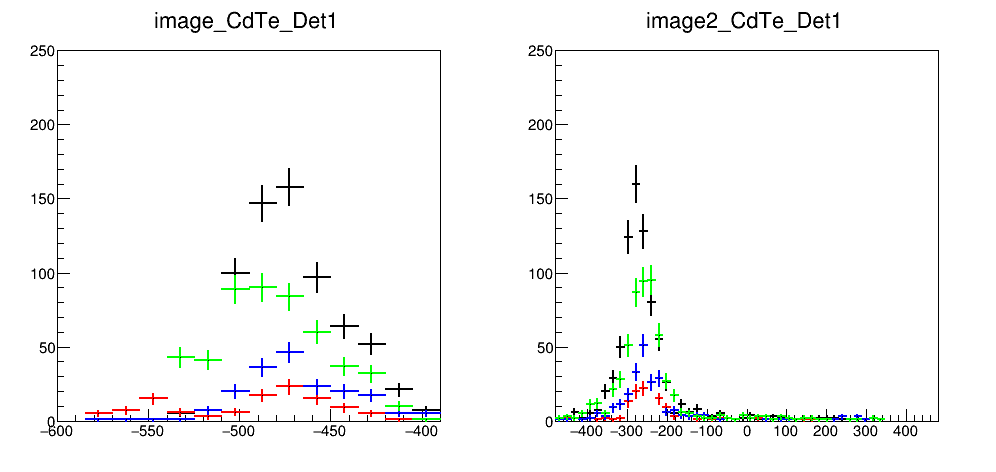

In [28]:
import ROOT
from datetime import datetime, timedelta

%jsroot off
import numpy as np

file1 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(1)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(2)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file3 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(3)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file4 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(4)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file5 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")


ROOT.gStyle.SetOptStat(0)
tree1 = file1.Get("eventtree")
tree2 = file2.Get("eventtree")
tree3 = file3.Get("eventtree")
tree4 = file4.Get("eventtree")
tree5 = file5.Get("eventtree")

legends = ["CdTe Det1","CdTe Det2","CdTe Det3","CdTe Det4"]
colors=[ROOT.kBlack,ROOT.kRed, ROOT.kBlue, ROOT.kGreen]
    
counter=0

trees=[tree1,tree2,tree3,tree4,tree5]
trees=[tree1,tree2,tree3,tree4]
# Create a canvas to draw the histograms
canvas = ROOT.TCanvas("canvas", "canvas",1000,500)
canvas.Divide(2)


# ISO 8601形式の文字列
date_string = "2024-04-17T22:14:39.6"

# 文字列をdatetimeオブジェクトに変換
date_object = datetime.fromisoformat(date_string)


hists=[]




for i in range(len(trees)):
    hist_name="image_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name ,80,-600,600))
    
    
duration_name=  "T1_posxposy_CdTe1to4" 
cond="approx_passed_time_from_launch_sec+  887.5-886.2>330&&approx_passed_time_from_launch_sec+  887.5-886.2<370 "

for i,tree in enumerate(trees):
    hist_name="image_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330", "colz")
    elif(i==0):
        canvas.cd(1)
        tree.Draw(f"det_rot_x_arcsec>>"+hist_name, cond, "E")
    else:
        canvas.cd(1)
        tree.Draw(f"det_rot_x_arcsec>>"+hist_name, cond, "Esame")




for i in range(len(trees)):
    hist_name="image2_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name ,50,-480,480))
    
for i,tree in enumerate(trees):
    hist_name="image2_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<30", "colz")
    elif(i==0):
        canvas.cd(2)
        tree.Draw(f"det_rot_y_arcsec>>"+hist_name, cond, "E")
    else:
        canvas.cd(2)
        tree.Draw(f"det_rot_y_arcsec>>"+hist_name, cond, "Esame")


hist_pos= ROOT.TH1D(duration_name,"",8,0.5,8.5)
 

counter=0

# histall=hists[0].Clone()
# for i in range(3):
#     histall.Add(hists[i+1])
    
for hist in hists[:4]:
    draw_option="E"
    #hist.Scale(1/200)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+1, calc_mean(hist))
    if(counter==0):
        draw_option="E"
        hist.GetXaxis().SetRangeUser(-600,-400)
        hist.GetYaxis().SetRangeUser(0,250)
    else:
        draw_option="Esame"
    canvas.cd(1).SetLogy(0)

    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    hist.SetLineWidth(2)
    counter+=1
    if(counter>=4):
        break

counter=0

for hist in hists[4:]:
    draw_option="E"
    #hist.Scale(1/200)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+2, calc_mean(hist))
    if(counter==0):
        draw_option="E"
        #hist.GetXaxis().SetRangeUser(500,2500)
        hist.GetYaxis().SetRangeUser(0,250)

    else:
        draw_option="Esame"
    canvas.cd(2).SetLogy(0)
    hist.SetLineWidth(2)
    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    counter+=1
    if(counter>=4):
        break

canvas.Draw()

-371.95500387897596
-368.93203883495147
-384.9579831932773
-371.3448802852776
-62.121212121212125
-47.129629629629626
-47.142857142857146
-52.76533592989289


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


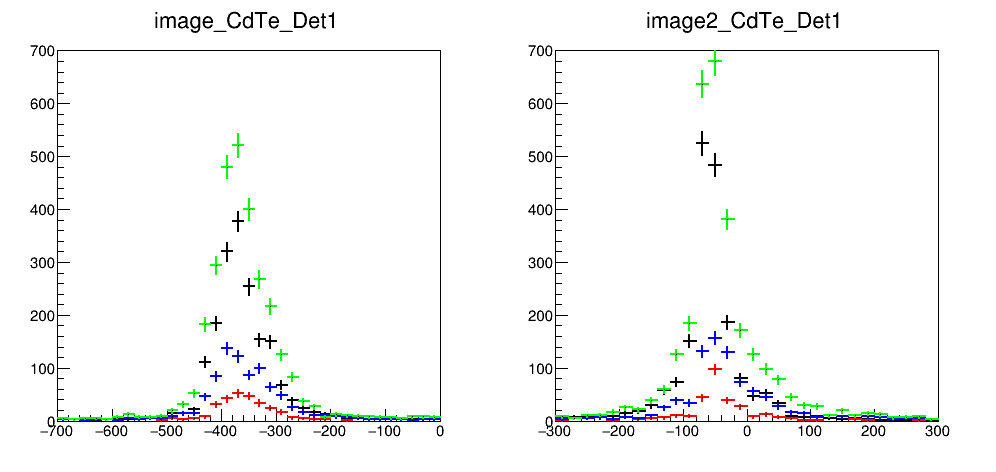

In [34]:
import ROOT
from datetime import datetime, timedelta

%jsroot off
import numpy as np

file1 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(1)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(2)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file3 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(3)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file4 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(4)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file5 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")


ROOT.gStyle.SetOptStat(0)
tree1 = file1.Get("eventtree")
tree2 = file2.Get("eventtree")
tree3 = file3.Get("eventtree")
tree4 = file4.Get("eventtree")
tree5 = file5.Get("eventtree")

legends = ["CdTe Det1","CdTe Det2","CdTe Det3","CdTe Det4"]
colors=[ROOT.kBlack,ROOT.kRed, ROOT.kBlue, ROOT.kGreen]
    
counter=0


trees=[tree1,tree2,tree3,tree4]
# Create a canvas to draw the histograms
canvas = ROOT.TCanvas("canvas", "canvas",1000,500)
canvas.Divide(2)

hists=[]




for i in range(len(trees)):
    hist_name="image_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name ,100,-1000,1000))
    
    
cond="approx_passed_time_from_launch_sec+  887.5-886.2>100&&approx_passed_time_from_launch_sec+  887.5-886.2<130"

for i,tree in enumerate(trees):
    hist_name="image_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330", "colz")
    elif(i==0):
        canvas.cd(1)
        tree.Draw(f"helio_x_arcsec_shift>>"+hist_name, cond, "E")
    else:
        canvas.cd(1)
        tree.Draw(f"helio_x_arcsec_shift>>"+hist_name, cond, "Esame")




for i in range(len(trees)):
    hist_name="image2_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH1D(hist_name, hist_name, 100,-1000,1000))
    
for i,tree in enumerate(trees):
    hist_name="image2_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(2)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<30", "colz")
    elif(i==0):
        canvas.cd(2)
        tree.Draw(f"helio_y_arcsec_shift>>"+hist_name, cond, "E")
    else:
        canvas.cd(2)
        tree.Draw(f"helio_y_arcsec_shift>>"+hist_name, cond, "Esame")


hist_pos= ROOT.TH1D(duration_name,"",8,0.5,8.5)
 

counter=0

# histall=hists[0].Clone()
# for i in range(3):
#     histall.Add(hists[i+1])
    
for hist in hists[:4]:
    draw_option="E"
    #hist.Scale(1/200)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+1, calc_mean(hist))
    if(counter==0):
        draw_option="E"
        hist.GetXaxis().SetRangeUser(-700,0)
        hist.GetYaxis().SetRangeUser(0,700)
    else:
        draw_option="Esame"
    canvas.cd(1).SetLogy(0)

    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    hist.SetLineWidth(2)
    counter+=1
    if(counter>=4):
        break

counter=0

for hist in hists[4:]:
    draw_option="E"
    #hist.Scale(1/200)
    print(calc_mean(hist))
    hist_pos.SetBinContent(2*counter+2, calc_mean(hist))
    if(counter==0):
        draw_option="E"
        hist.GetXaxis().SetRangeUser(-300,300)
        hist.GetYaxis().SetRangeUser(0,700)

    else:
        draw_option="Esame"
    canvas.cd(2).SetLogy(0)
    hist.SetLineWidth(2)
    hist.Draw(draw_option)
    # hist.SetMinimum(-0.1)
    hist.SetLineColor(colors[counter])
    counter+=1
    if(counter>=4):
        break

canvas.Draw()

In [41]:
import ROOT
from datetime import datetime, timedelta

%jsroot on
import numpy as np

file1 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(1)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(2)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file3 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(3)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file4 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(4)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file5 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")


ROOT.gStyle.SetOptStat(0)
tree1 = file1.Get("eventtree")
tree2 = file2.Get("eventtree")
tree3 = file3.Get("eventtree")
tree4 = file4.Get("eventtree")
tree5 = file5.Get("eventtree")

legends = ["CdTe Det1","CdTe Det2","CdTe Det3","CdTe Det4"]

    
counter=0

trees=[tree1,tree2,tree3,tree4,tree5]
trees=[tree1,tree2,tree3,tree4]
# Create a canvas to draw the histograms
canvas = ROOT.TCanvas("canvas", "canvas", 1000, 1000)
canvas.Divide(2,2)


# ISO 8601形式の文字列
date_string = "2024-04-17T22:14:39.6"

# 文字列をdatetimeオブジェクトに変換
date_object = datetime.fromisoformat(date_string)


hists=[]

import ROOT


# 半透明の四角形(TBox)を作成
box = ROOT.TBox(-1000, -1000, 1000, 1000)
box.SetFillColorAlpha(ROOT.kBlue, 0.3)  # 色と透明度を設定 (0.0から1.0の範囲)



for i in range(len(trees)):
    hist_name="image_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH2D(hist_name, hist_name ,400,-1200,1200,400,-1200,1200))
    
cond="approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330 "

for i,tree in enumerate(trees):
    hist_name="image_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(4)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330", "colz")
    else:
        canvas.cd(i+1)
        tree.Draw(f"helio_y_arcsec_shift:helio_x_arcsec_shift>>"+hist_name, cond, "colz")

    dx=hists[i].GetMean(1)
    dy = hists[i].GetMean(2)
    print(dx,dy,np.sqrt(dx**2+dy**2),hists[i].GetMaximumBin())
    

ROOT.gStyle.SetPalette(ROOT.kBlueRedYellow);
ROOT.gStyle.SetPalette(62)

counter=0
histall=hists[0].Clone()
for i in range(3):
    histall.Add(hists[i+1])

for hist in hists:
    draw_option="colz"
    #hist.Scale(1/200)
    canvas.cd(counter+1)
    hist.Draw(draw_option)
    hist.SetMinimum(-0.1)
    hist.Rebin2D(3,3)
    counter+=1
    print(counter)
    if(counter>=4):
        break

canvas.Draw()



-366.65663968219445 -52.0062797843719 370.32653774749787 76920
-369.48700276048163 -46.39999003433417 372.38904962969906 77723
-360.21477313791985 -42.79330960392759 362.7477775723246 77321
-373.33677161700945 -49.93786376970967 376.66183146065276 77322
1
2
3
4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


In [112]:
import ROOT
from datetime import datetime, timedelta

%jsroot on
import numpy as np

file1 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(1)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(2)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file3 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(3)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file4 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(4)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file5 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")


ROOT.gStyle.SetOptStat(0)
tree1 = file1.Get("eventtree")
tree2 = file2.Get("eventtree")
tree3 = file3.Get("eventtree")
tree4 = file4.Get("eventtree")
tree5 = file5.Get("eventtree")

legends = ["CdTe Det1","CdTe Det2","CdTe Det3","CdTe Det4"]

    
counter=0

trees=[tree1,tree2,tree3,tree4,tree5]
trees=[tree1,tree2,tree3,tree4]
# Create a canvas to draw the histograms
canvas = ROOT.TCanvas("canvas", "canvas", 1000, 1000)
canvas.Divide(2,2)


# ISO 8601形式の文字列
date_string = "2024-04-17T22:14:39.6"

# 文字列をdatetimeオブジェクトに変換
date_object = datetime.fromisoformat(date_string)


hists=[]

import ROOT


# 半透明の四角形(TBox)を作成
box = ROOT.TBox(-1000, -1000, 1000, 1000)
box.SetFillColorAlpha(ROOT.kBlue, 0.3)  # 色と透明度を設定 (0.0から1.0の範囲)



for i in range(len(trees)):
    hist_name="image_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH2D(hist_name, hist_name ,250,-500,-250,250,-200,50))
    
cond="approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330 "

for i,tree in enumerate(trees):
    hist_name="image_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(4)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330", "colz")
    else:
        canvas.cd(i+1)
        tree.Draw(f"helio_y_arcsec:helio_x_arcsec>>"+hist_name, cond, "colz")

    dx=hists[i].GetMean(1)
    dy = hists[i].GetMean(2)
    print(dx,dy,np.sqrt(dx**2+dy**2),hists[i].GetMaximumBin())
    

ROOT.gStyle.SetPalette(ROOT.kBlueRedYellow);
ROOT.gStyle.SetPalette(62)

counter=0
histall=hists[0].Clone()
for i in range(3):
    histall.Add(hists[i+1])

for hist in hists:
    draw_option="colz"
    #hist.Scale(1/200)
    canvas.cd(counter+1)
    hist.Draw(draw_option)
    palette = hist.GetListOfFunctions().FindObject("palette")
    
    hist.SetMinimum(-0.1)
    hist.Rebin2D(3,3)
    counter+=1
    print(counter)
    if(counter>=4):
        break

canvas.cd(4)
histall.Draw("colz")


histall.Scale(1./9)
histall.Rebin2D(6,6)
histall.SetMaximum(48)
histall.SetMinimum(-0.1)
canvas.Draw()



-379.3490942301934 -60.45974299441481 384.13684516877424 33892
-385.0739038169847 -53.33591052451746 388.75008778433954 34622
-381.03986486472525 -52.97925969329035 384.7053165395264 34634
-385.20252519316386 -57.716070676373974 389.50241363759255 35150
1
2
3
4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


8.930713519141346 9.035181660343707 12.704021079815053 4416
9.56012963319665 9.862254493336097 13.73536101800214 4830
7.582519148276478 7.650116202213158 10.771205807213216 2623
9.690998495953705 9.446861198243514 13.533611430340974 4280
1
2
3
4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


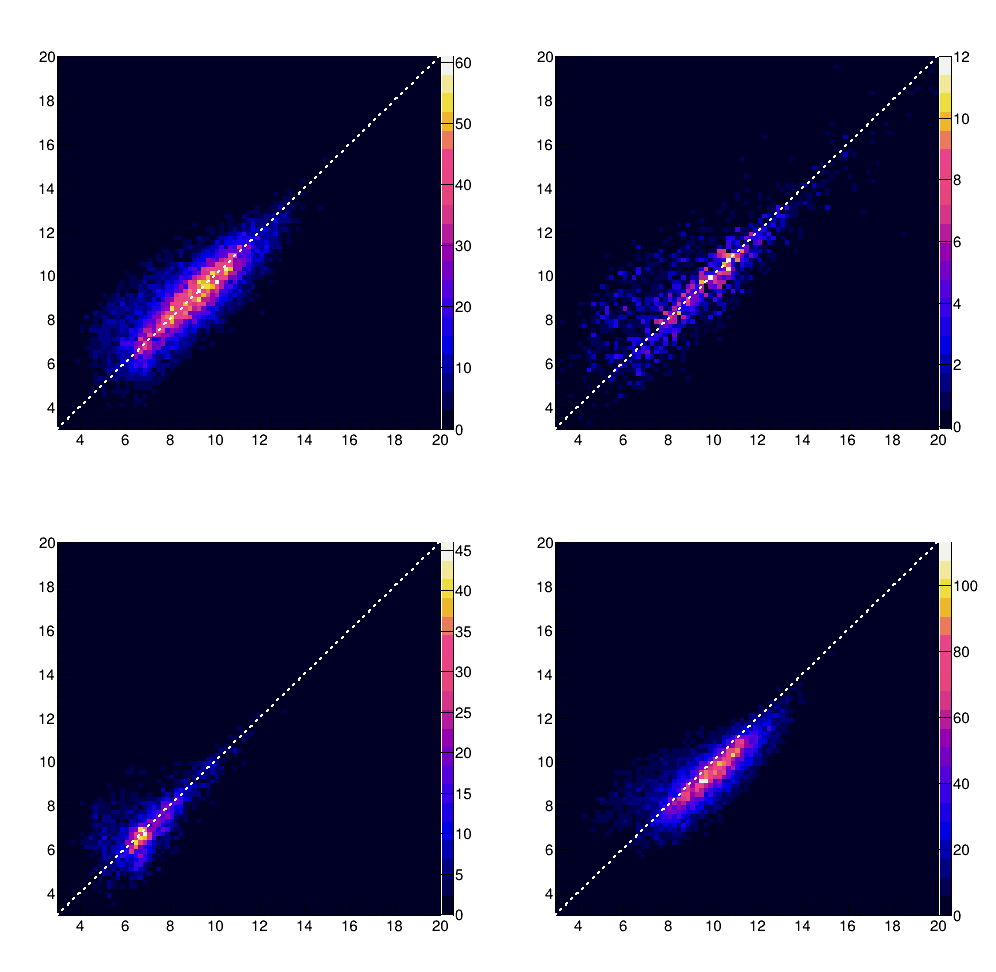

In [304]:
import ROOT
from datetime import datetime, timedelta

%jsroot off
import numpy as np

file1 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(1)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(2)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file3 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(3)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file4 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(4)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file5 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")


ROOT.gStyle.SetOptStat(0)
tree1 = file1.Get("eventtree")
tree2 = file2.Get("eventtree")
tree3 = file3.Get("eventtree")
tree4 = file4.Get("eventtree")
tree5 = file5.Get("eventtree")

legends = ["CdTe Det1","CdTe Det2","CdTe Det3","CdTe Det4"]

    
counter=0

trees=[tree1,tree2,tree3,tree4,tree5]
trees=[tree1,tree2,tree3,tree4]
# Create a canvas to draw the histograms
canvas = ROOT.TCanvas("canvas", "canvas", 1000, 1000)
canvas.Divide(2,2)


# ISO 8601形式の文字列
date_string = "2024-04-17T22:14:39.6"

# 文字列をdatetimeオブジェクトに変換
date_object = datetime.fromisoformat(date_string)


hists=[]

import ROOT


# 半透明の四角形(TBox)を作成
box = ROOT.TBox(-1000, -1000, 1000, 1000)
box.SetFillColorAlpha(ROOT.kBlack, 0.3)  # 色と透明度を設定 (0.0から1.0の範囲)
line = ROOT.TLine(3,3,20,20)
line.SetLineColor(ROOT.kWhite)
line.SetLineStyle(2)
line.SetLineWidth(2)


for i in range(len(trees)):
    hist_name="image_CdTe_Det"+str(i+1)
    hists.append(ROOT.TH2D(hist_name, "",135,3,30,135,3,30 ))
    
cond="approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330 "

for i,tree in enumerate(trees):
    hist_name="image_CdTe_Det"+str(i+1)
    if(i==4):
        canvas.cd(4)
        tree.Draw(f" helio_y_arcsec_shift: helio_x_arcsec_shift>>"+hist_name, "approx_passed_time_from_launch_sec+  887.5-886.2>10&&approx_passed_time_from_launch_sec+  887.5-886.2<330", "colz")
    else:
        canvas.cd(i+1)
        tree.Draw(f" gapmod_epi_al/1.034: gapmod_epi_pt>>"+hist_name, cond, "colz")

    dx=hists[i].GetMean(1)
    dy = hists[i].GetMean(2)
    print(dx,dy,np.sqrt(dx**2+dy**2),hists[i].GetMaximumBin())
    

ROOT.gStyle.SetPalette(ROOT.kBlueRedYellow);
ROOT.gStyle.SetPalette(62)

counter=0
histall=hists[0].Clone()
for i in range(3):
    histall.Add(hists[i+1])

for hist in hists:
    draw_option="colz"
    #hist.Scale(1/200)
    canvas.cd(counter+1)
    hist.Draw(draw_option)
    hist.GetXaxis().SetRangeUser(3,20)
    hist.GetYaxis().SetRangeUser(3,20)
    hist.SetMinimum(-0.1)

    

    line.Draw("SAME")
    
    
    canvas.Draw()
    palette = hist.GetListOfFunctions().FindObject("palette")
    if palette:
        # 現在のNDC座標を取得
        x1 = palette.GetX1NDC()
        x2 = palette.GetX2NDC()
        width = x2 - x1

        # 幅を半分に設定
        palette.SetX2NDC(x1 + width / 2.0)

        # 変更内容を反映
        canvas.Modified()
        canvas.Update()
    counter+=1
    print(counter)
    if(counter>=4):
        break


canvas.Draw()



Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


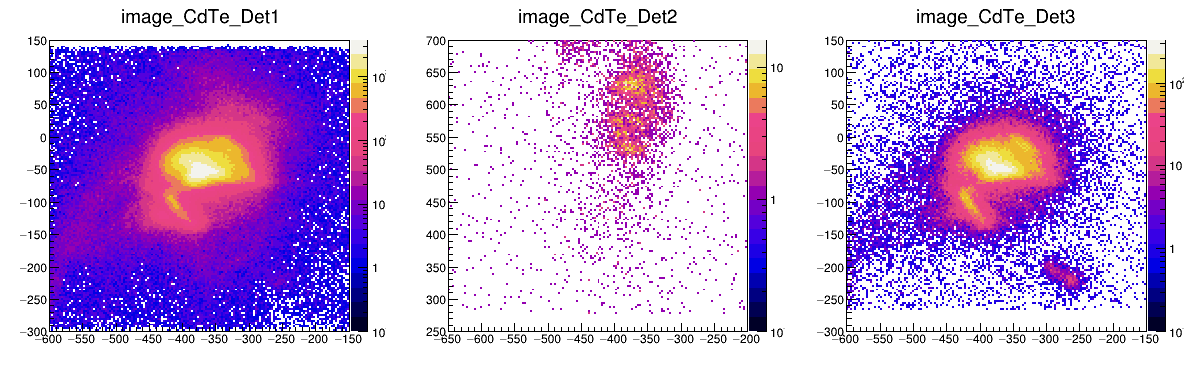

In [247]:
import ROOT
from datetime import datetime, timedelta

%jsroot off
import numpy as np

file1 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(1)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(2)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file3 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(3)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file4 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(4)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file5 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")


ROOT.gStyle.SetOptStat(0)
tree1 = file1.Get("eventtree")
tree2 = file2.Get("eventtree")
tree3 = file3.Get("eventtree")
tree4 = file4.Get("eventtree")
tree5 = file5.Get("eventtree")

legends = ["CdTe Det1","CdTe Det2","CdTe Det3","CdTe Det4"]

    
counter=0

trees=[tree1,tree2,tree3,tree4,tree5]
# Create a canvas to draw the histograms
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 400)
canvas.Divide(3)


# ISO 8601形式の文字列
date_string = "2024-04-17T22:14:39.6"

# 文字列をdatetimeオブジェクトに変換
date_object = datetime.fromisoformat(date_string)


hists=[]


for i in range(3):
    hist_name="image_CdTe_Det"+str(i+1)
    
    if(not(i==1)):
        hists.append(ROOT.TH2D(hist_name, hist_name ,450,-600,-150,450,-300,150))
    else:
        hists.append(ROOT.TH2D(hist_name, hist_name ,450,-650,-200,450,250,700))
    
cond1="approx_passed_time_from_launch_sec+  887.5-886.2>100&&approx_passed_time_from_launch_sec+  887.5-886.2<330 "
cond2="approx_passed_time_from_launch_sec+  887.5-886.2>325&&approx_passed_time_from_launch_sec+  887.5-886.2<370"
cond3="approx_passed_time_from_launch_sec+  887.5-886.2>400&&approx_passed_time_from_launch_sec+  887.5-886.2<430 "

conds=[cond1,cond2,cond3]

for i,cond in enumerate(conds):
    hist_name="image_CdTe_Det"+str(i+1)
    canvas.cd(i+1).SetLogz()
    tree5.Draw(f"helio_y_arcsec_shift:helio_x_arcsec_shift>>"+hist_name, cond, "colz")
    hists[i].Rebin2D(3,3)
    hists[i].SetMinimum(0.1)
    

ROOT.gStyle.SetPalette(ROOT.kBlueRedYellow);
ROOT.gStyle.SetPalette(62)

# counter=0
# histall=hists[0].Clone()
# for i in range(3):
#     histall.Add(hists[i+1])

# for hist in hists:
#     draw_option="colz"
#     #hist.Scale(1/200)
#     canvas.cd(counter+1)
#     hist.Draw(draw_option)
#     hist.SetMinimum(-0.1)
#     hist.Rebin2D(3,3)
#     counter+=1
#     print(counter)
#     if(counter>=4):
#         break

# canvas.cd(4)
# histall.Draw("colz")


# histall.Scale(1./9)
# histall.Rebin2D(6,6)
# histall.SetMaximum(48)
# histall.SetMinimum(-0.1)
canvas.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


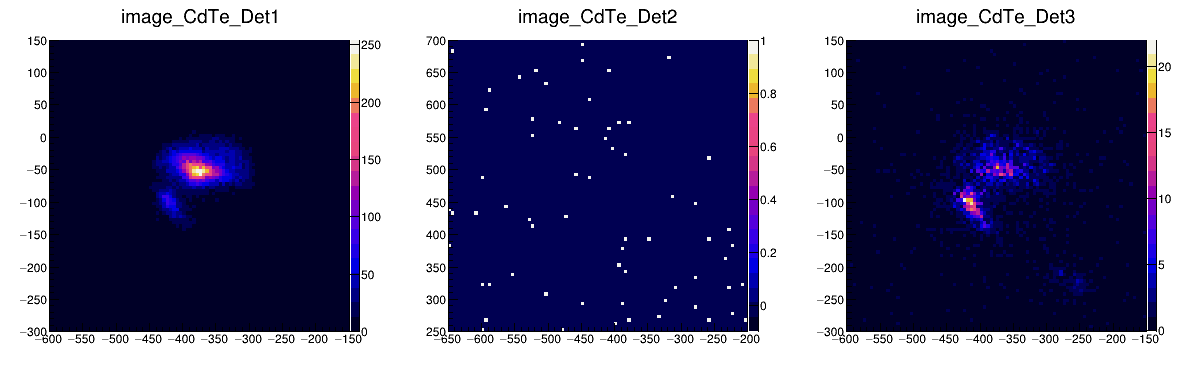

In [5]:
import ROOT
from datetime import datetime, timedelta

%jsroot off
import numpy as np

file1 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(1)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(2)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file3 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(3)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file4 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdte"+str(4)+"_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file5 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")
file6= ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdteAll_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")


ROOT.gStyle.SetOptStat(0)
tree1 = file1.Get("eventtree")
tree2 = file2.Get("eventtree")
tree3 = file3.Get("eventtree")
tree4 = file4.Get("eventtree")
tree5 = file5.Get("eventtree")
tree6 = file6.Get("eventtree")

legends = ["CdTe Det1","CdTe Det2","CdTe Det3","CdTe Det4"]

    
counter=0

trees=[tree1,tree2,tree3,tree4,tree5]
# Create a canvas to draw the histograms
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 400)
canvas.Divide(3)


# ISO 8601形式の文字列
date_string = "2024-04-17T22:14:39.6"

# 文字列をdatetimeオブジェクトに変換
date_object = datetime.fromisoformat(date_string)


hists=[]


for i in range(3):
    hist_name="image_CdTe_Det"+str(i+1)
    
    if(not(i==1)):
        hists.append(ROOT.TH2D(hist_name, hist_name ,450,-600,-150,450,-300,150))
    else:
        #hists.append(ROOT.TH2D(hist_name, hist_name ,450,-600,-150,450,-300,150))
        hists.append(ROOT.TH2D(hist_name, hist_name ,450,-650,-200,450,250,700))
    
cond1="approx_passed_time_from_launch_sec+  887.5-886.2>100&&approx_passed_time_from_launch_sec+  887.5-886.2<325"
cond2="approx_passed_time_from_launch_sec+  887.5-886.2>330&&approx_passed_time_from_launch_sec+  887.5-886.2<370"
cond3="approx_passed_time_from_launch_sec+  887.5-886.2>400&&approx_passed_time_from_launch_sec+  887.5-886.2<430 "

conds=[cond1,cond2,cond3]

for i,cond in enumerate(conds):
    hist_name="image_CdTe_Det"+str(i+1)
    canvas.cd(i+1)
    tree6.Draw(f"helio_y_arcsec_shift:helio_x_arcsec_shift>>"+hist_name, cond, "colz")
    hists[i].Rebin2D(5,5)
    hists[i].SetMinimum(-0.1)
    canvas.Draw()
    palette = hists[i].GetListOfFunctions().FindObject("palette")
    if palette:
        # 現在のNDC座標を取得
        x1 = palette.GetX1NDC()
        x2 = palette.GetX2NDC()
        width = x2 - x1

        # 幅を半分に設定
        palette.SetX2NDC(x1 + width / 2.0)

        # 変更内容を反映
        canvas.Modified()
        canvas.Update()
    

ROOT.gStyle.SetPalette(ROOT.kBlueRedYellow);
ROOT.gStyle.SetPalette(62)
# ROOT.gStyle.SetPalette(53)

# counter=0
# histall=hists[0].Clone()
# for i in range(3):
#     histall.Add(hists[i+1])

# for hist in hists:
#     draw_option="colz"
#     #hist.Scale(1/200)
#     canvas.cd(counter+1)
#     hist.Draw(draw_option)
#     hist.SetMinimum(-0.1)
#     hist.Rebin2D(3,3)
#     counter+=1
#     print(counter)
#     if(counter>=4):
#         break

# canvas.cd(4)
# histall.Draw("colz")


# histall.Scale(1./9)
# histall.Rebin2D(6,6)
# histall.SetMaximum(48)
# histall.SetMinimum(-0.1)
canvas.Draw()

In [6]:
def make_spectrum(tree,cond,canvas):


    # Create a canvas to draw the histograms
    


    # ISO 8601形式の文字列
    date_string = "2024-04-17T22:14:39.6"

    # 文字列をdatetimeオブジェクトに変換
    date_object = datetime.fromisoformat(date_string)
    image =ROOT.TH2D("image", "image" ,45,-450,-180,50,-250,50 )
    canvas.cd()
    tree.Draw(f"helio_y_arcsec_shift:helio_x_arcsec_shift>>image", cond, "colz")
    canvas.Draw()
    
    hists=[]
    legends = []
    dt =30
    
    file_Nos=[105,165,225,400]
    for file_No in file_Nos:
        
        canvas.cd()
        
        hist_name="hist_"+str(file_No)
        hists.append(ROOT.TH1D(hist_name, hist_name, 60,0,30))
        legend_text = f"{file_No} sec - {file_No+dt} sec"
        legends.append(legend_text)
        
    counter=0
    #hist_name="hist_All"
    #hists.append(ROOT.TH1D(hist_name, hist_name, 60,0,30))
    #legend_text = f"All"
    #legends.append(legend_text)
    for file_No in file_Nos:
        hist_name="hist_"+str(file_No)

        canvas.cd().SetLogy(1)
        tree.Draw(f" gapmod_epi_pt>>"+hist_name, cond+f"&&approx_passed_time_from_launch_sec+1.3>{file_No}&&approx_passed_time_from_launch_sec+1.3<{file_No+dt}", "")
        
    canvas.cd().SetLogy(1)
    tree.Draw(f" gapmod_epi_pt>>hist_All", cond, "")

    canvas.cd().SetLogy(1)
    return hists, legends, image


In [82]:
file = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdteAll_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
tree = file.Get("eventtree")
%jsroot on
canvas = ROOT.TCanvas("canvas", "canvas", 800, 600)
cond = "pt_nhit<3"
hists,legends,image=make_spectrum(tree,cond,canvas)
colors =[ROOT.kBlack,ROOT.kRed, ROOT.kBlue, ROOT.kGreen, ROOT.kOrange]
canvas.Draw()
counter=0
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
for hist in hists:
    hist.Sumw2()
    if(counter==0):
        draw_option=""

    else:
        draw_option="same"

    canvas.cd().SetLogy(0)
    hist.SetLineColor(colors[counter])
    hist.GetYaxis().SetLimits(0,100)
    hist.GetYaxis().SetRangeUser(0,2000)
    hist.GetXaxis().SetRangeUser(3,20)
    hist.Rebin(2)
    hist.SetLineWidth(3)
    hist.Draw(draw_option)
    
    legend.AddEntry(hist, legends[counter], "l")
    counter+=1
    print(counter)
    if(counter>=7):
        break
legend.Draw()
canvas.Draw()

1
2
3
4


In [98]:

canvas = ROOT.TCanvas("canvas", "canvas", 600, 600)
image =ROOT.TH2D("image", "image" ,45,-450,-180,50,-250,50 )
# image.GetYaxis().SetRangeUser(-200,-100)
# image.GetXaxis().SetRangeUser(-350,-300)
canvas.cd()
tree.Draw(f"helio_y_arcsec_shift:helio_x_arcsec_shift>>image", cond+f"&&approx_passed_time_from_launch_sec+1.3>{105}&&approx_passed_time_from_launch_sec+1.3<{305}", "colz")
canvas.Draw()
image.Integral()


31382.0

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: image (Potential memory leak).


In [4]:

def save_canvas_to_pdf():
    # TCanvasの作成
    c1 = ROOT.TCanvas("c1", "Canvas", 2400, 400)
    c1.Divide(6)

    # PDFファイルのオープン
    c1.Print("output.pdf[")

    file = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdteAll_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
    file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")

    tree = file.Get("eventtree")
    tree2 = file2.Get("eventtree")

        
    counter=0


    cond00="&&reconst_epi<3"
    cond0="&&reconst_epi>3&&reconst_epi<5"
    cond1="&&reconst_epi>5&&reconst_epi<8"
    cond2="&&gapmod_epi_pt>8&&gapmod_epi_pt<10"
    cond3="&&gapmod_epi_pt>10&&gapmod_epi_pt<12"
    cond4="&&gapmod_epi_pt>12&&gapmod_epi_pt<15"
    cond5="&&gapmod_epi_pt>15&&gapmod_epi_pt<20"
    

    legends = ["E<3 keV","3<E<5 keV","5<E<8 keV","5<E<10 keV","10keV<E<12 keV","12keV<E<15 keV","E>15 keV"]
    # legends = ["E<10 keV","E>12 keV","Ratio"]
    conds=[cond00,cond0,cond1,cond2,cond3,cond4,cond5]
    # conds=[cond2,cond5,cond1]

    # Create a canvas to draw the histograms
    canvas = ROOT.TCanvas("canvas", "canvas", 1000, 1000)
    canvas.Divide(2,2)


    # ISO 8601形式の文字列
    date_string = "2024-04-17T22:14:39.6"

    # 文字列をdatetimeオブジェクトに変換
    date_object = datetime.fromisoformat(date_string)
    ROOT.gStyle.SetPalette(ROOT.kBlueRedYellow);
    ROOT.gStyle.SetPalette(62)
    # ROOT.gStyle.SetPalette(53)


    hists=[]
    dt=30
    ntimes =[105,180,255,400]
    ntimes =[105,175,245,400]
    dts=[70,70,70,30]
    max_counts=[]

    for n_ntime,ntime in enumerate(ntimes):
        hists.append([])
        for i in range(len(conds)):
            hist_name="image_CdTe_"+legends[i]+str(ntime)
            #hists.append(ROOT.TH2D(hist_name, legends[i] ,180,-450,-180,200,-250,50 ))
            hists[n_ntime].append(ROOT.TH2D(hist_name, hist_name+str(date_object+timedelta(seconds=ntime)) ,450,-600,-150,450,-300,150 ))#hists.append(ROOT.TH2D(hist_name, hist_name ,450,-600,-150,450,-300,150))
            
        for i,cond in enumerate(conds):
            dt=dts[n_ntime]
            hist_name="image_CdTe_"+legends[i]+str(ntime)
            c1.cd(i+1)
            if(i<=2):
                tree2.Draw(f"helio_y_arcsec_shift:helio_x_arcsec_shift>>"+hist_name, f"approx_passed_time_from_launch_sec+1.3>{ntime}&&approx_passed_time_from_launch_sec+1.3<{ntime+dt}"+cond, "colz")
            else:
                tree.Draw(f"helio_y_arcsec_shift:helio_x_arcsec_shift>>"+hist_name, f"pt_nhit<3&&approx_passed_time_from_launch_sec+1.3>{ntime}&&approx_passed_time_from_launch_sec+1.3<{ntime+dt}"+cond, "colz")
            
                
        # hists[ntime][-1].Reset()  # 内容をクリア

        # # hist1とhist2のビンの商を計算し、hist3に格納
        # for xbin in range(1, hists[ntime][0].GetNbinsX() + 1):
        #     for ybin in range(1, hists[ntime][0].GetNbinsY() + 1):
        #         bin_content1 = hists[ntime][0].GetBinContent(hists[ntime][0].GetBin(xbin, ybin))
        #         bin_content2 = hists[ntime][1].GetBinContent(hists[ntime][1].GetBin(xbin, ybin))
                
        #         if bin_content1 >20:
        #             bin_content3 = bin_content2/bin_content1 
        #         else:
        #             bin_content3 = 0  # ゼロ除算を避けるために0を代入
                    
        #         hists[ntime][-1].SetBinContent(xbin, ybin, bin_content3)
        #         #ROOT.gStyle.SetPalette(ROOT.kBird)
        #         # if(bin_content3>0.4):
        #         #     print( bin_content1,"", bin_content2,"",bin_content3*np.sqrt((np.sqrt(bin_content1 )/bin_content1 )**2+np.sqrt(bin_content2 )/bin_content2 )**2)
                
                    

        counter=0
        for hist in hists[n_ntime]:
            hist.SetMinimum(-0.01)
            hist.Rebin2D(5,5)
            c1.cd(counter+1).SetLogz(0)
            # if(n_ntime==0):
            #     max_counts.append(hist.GetMaximum())
            # hist.SetMaximum(max_counts[counter])
                
            """
            #             #if(counter==0):
            #     #hist.SetMaximum(100)
            #     #hist.Rebin2D(10,10)
            # #if(counter==1):
            #     #hist.Rebin2D(10,10)
            #     #hist.SetMaximum(20)
            
            """

            # if(counter==2):
            #     c1.cd(counter+1).SetLogz(0)
            #     hist.SetMaximum(0.6)
            #     hist.SetMinimum(0)
            draw_option="colz"
            
            hist.Draw(draw_option)
            counter+=1
            print(counter)
            # if(counter>=4):
            #     break
            c1.Draw()
            palette = hist.GetListOfFunctions().FindObject("palette")
            if palette:
                # 現在のNDC座標を取得
                x1 = palette.GetX1NDC()
                x2 = palette.GetX2NDC()
                width = x2 - x1

                # 幅を半分に設定
                palette.SetX2NDC(x1 + width / 2.0)

                # 変更内容を反映
                c1.Modified()
                c1.Update()

        ROOT.gStyle.SetOptStat(0)
                # キャンバスをPDFに保存
        c1.Print("output.pdf")



    # PDFファイルをクローズ
    c1.Print("output.pdf]")

if __name__ == "__main__":
    save_canvas_to_pdf()


1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7


Info in <TCanvas::Print>: pdf file output.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: Current canvas added to pdf file output.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file output.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file output.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file output.pdf
Info in <TCanvas::Print>: pdf file output.pdf has been closed


In [97]:


def create_lines_from_vertices(x_coords, y_coords):
    """
    与えられた頂点座標を基に、直線を作成し、y=ax+bまたはx=aの形で係数を計算する。

    Args:
        x_coords (list of float): x座標のリスト。
        y_coords (list of float): y座標のリスト。

    Returns:
        list of tuple: 各直線の形と係数 ("y=ax+b", a, b) または ("x=a", a, None)
    """
    if len(x_coords) != len(y_coords):
        raise ValueError("x_coords と y_coords の長さは一致している必要があります。")

    lines = []
    coefficients = []
    n = len(x_coords)

    for i in range(n):
        x_start = x_coords[i]
        y_start = y_coords[i]
        x_end = x_coords[(i + 1) % n]  # 最後の点と最初の点を結ぶためにモジュロを使用
        y_end = y_coords[(i + 1) % n]

        if x_start == x_end:  # 垂直な線の場合
            coefficients.append((False, x_start, None))
        else:  # 傾きと切片を計算
            a = (y_end - y_start) / (x_end - x_start)
            b = y_start - a * x_start
            coefficients.append((True, a, b))

        line = ROOT.TLine(x_start, y_start, x_end, y_end)
        lines.append(line)

    return lines, coefficients

def draw_lines(lines, color=ROOT.kRed, width=2):
    """
    直線リストを描画する。

    Args:
        lines (list of ROOT.TLine): 描画する直線のリスト。
        color (int): 線の色。
        width (int): 線の太さ。
    """
    for line in lines:
        line.SetLineColor(color)
        line.SetLineWidth(width)
        line.Draw("same")
        
def line_to_cond(coefficients):
    
    counter=0
    cond=""
    y="helio_y_arcsec_shift"
    x="helio_x_arcsec_shift"
    for coef in coefficients:
        if(counter==0):
            if(coef[0]):
                cond=y+">"+x+"*"+str(coef[1])+"+"+str(coef[2])
            else:
                cond=x+">"+str(coef[1])
        elif(counter==1):
            if(coef[0]):
                cond+="&&"+y+">"+x+"*"+str(coef[1])+"+"+str(coef[2])
            else:
                print("BAD structure")
                
        elif(counter==2):
            if(coef[0]):
                cond+="&&"+y+"<"+x+"*"+str(coef[1])+"+"+str(coef[2])
            else:
                cond+="&&"+x+"<"+str(coef[1])
                
                        
        elif(counter==3):
            if(coef[0]):
                cond+="&&"+y+"<"+x+"*"+str(coef[1])+"+"+str(coef[2])
            else:
                cond+="&&"+x+"<"+str(coef[1])
                
        else:
            print("too many points")
        counter+=1
        
    return cond
        

def save_canvas_to_pdf_withhardness(ntimes, hists,conds,legends,tree,tree2,dts):
    # TCanvasの作成
    c1 = ROOT.TCanvas("c1", "Canvas", 2400, 400)
    c1.Divide(6)

 



        
    counter=0



    


    # legends = ["E<10 keV","E>12 keV","Ratio"]
    
    # conds=[cond2,cond5,cond1]

    # Create a canvas to draw the histograms
    canvas = ROOT.TCanvas("canvas", "canvas", 1000, 1000)
    canvas.Divide(2,2)


    # ISO 8601形式の文字列
    date_string = "2024-04-17T22:14:39.6"

    # 文字列をdatetimeオブジェクトに変換
    date_object = datetime.fromisoformat(date_string)



    dt=30
    max_counts=[]
    # PDFファイルのオープン
    c1.Print("output_hardness.pdf[")
    xlims_world = [-400, -400, -340, -340]
    ylims_world = [-20, -80, -80, -20]

    # xlims_world = [-500, -420, -350, -420]
    # ylims_world = [-60, -150, -150, -60]
    lines, coefficients = create_lines_from_vertices(xlims_world, ylims_world)
    cond2=line_to_cond(coefficients)

    sum_bin1s=[]
    sum_bin2s=[]
    sum_counters=[]

    
    for n_ntime,ntime in enumerate(ntimes):

        hists.append([])
        dt=dts[n_ntime]
        for i,cond in enumerate(conds):
            hist_name="image_CdTe_"+legends[i]+str(ntime)
            c1.cd(i+1)
            if(i<=2):
                tree2.Draw(f"helio_y_arcsec_shift:helio_x_arcsec_shift>>"+hist_name, f"approx_passed_time_from_launch_sec+1.3>{ntime}&&approx_passed_time_from_launch_sec+1.3<{ntime+dt}"+cond+"&&"+cond2, "colz")
            else:
                tree.Draw(f"helio_y_arcsec_shift:helio_x_arcsec_shift>>"+hist_name, f"pt_nhit<3&&approx_passed_time_from_launch_sec+1.3>{ntime}&&approx_passed_time_from_launch_sec+1.3<{ntime+dt}"+cond+"&&"+cond2, "colz")
            hists[n_ntime][i].Rebin2D(10,10)
            # hists[n_ntime][i].Rebin2D(15,15)
        print(len(hists[n_ntime]))   
        hists[n_ntime][-1].Reset()  # 内容をクリア

        # hist1とhist2のビンの商を計算し、hist3に格納
        list1=0
        list2=2
        list1=2
        list2=4
        
        sum_bin1=0
        sum_bin2=0
        sum_counter=0
        for xbin in range(1, hists[n_ntime][list1].GetNbinsX() + 1):
            for ybin in range(1, hists[n_ntime][list1].GetNbinsY() + 1):
                bin_content1 = hists[n_ntime][list1].GetBinContent(hists[n_ntime][list1].GetBin(xbin, ybin))
                bin_content2 = hists[n_ntime][list2].GetBinContent(hists[n_ntime][list2].GetBin(xbin, ybin))
                
                if bin_content1 >25 and bin_content2 >0:
                    bin_content3 = bin_content2/bin_content1 
                    sum_bin1+=bin_content1
                    sum_bin2+=bin_content2
                    sum_counter+=1
                    # bin_content3 = np.sqrt(1/bin_content2+1/bin_content1)
                else:
                    bin_content3 = 0  # ゼロ除算を避けるために0を代入
                    
                hists[n_ntime][-1].SetBinContent(xbin, ybin, bin_content3)
                #ROOT.gStyle.SetPalette(ROOT.kBird)
                # if(bin_content3>0.4):
                #     print( bin_content1,"", bin_content2,"",bin_content3*np.sqrt((np.sqrt(bin_content1 )/bin_content1 )**2+np.sqrt(bin_content2 )/bin_content2 )**2)
                
        sum_bin1s.append(sum_bin1)  
        sum_bin2s.append(sum_bin2)    
        sum_counters.append(sum_counter)  

        counter=0

        for hist in hists[n_ntime]:
            # hist.SetMinimum(0.00001)
            
            c1.cd(counter+1).SetLogz(0)
            # if(n_ntime==0):
            #     max_counts.append(hist.GetMaximum())
            # hist.SetMaximum(max_counts[counter])
                
            """
            #             #if(counter==0):
            #     #hist.SetMaximum(100)
            #     #hist.Rebin2D(10,10)
            # #if(counter==1):
            #     #hist.Rebin2D(10,10)
            #     #hist.SetMaximum(20)
            
            """

            # if(counter==2):
            #     c1.cd(counter+1).SetLogz(0)
            #     hist.SetMaximum(0.6)
            #     hist.SetMinimum(0)
            draw_option="colz"
            
            hist.Draw(draw_option)
            hist.SetMaximum(0.25)
            hist.SetMaximum(0.60)
            counter+=1
            print(counter)
            # if(counter>=4):
            #     break
            c1.Draw()
            palette = hist.GetListOfFunctions().FindObject("palette")
            if palette:
                # 現在のNDC座標を取得
                x1 = palette.GetX1NDC()
                x2 = palette.GetX2NDC()
                width = x2 - x1

                # 幅を半分に設定
                palette.SetX2NDC(x1 + width / 2.0)

                # 変更内容を反映
                c1.Modified()
                c1.Update()

        ROOT.gStyle.SetOptStat(0)
                # キャンバスをPDFに保存
        c1.Print("output_hardness.pdf")
    # ROOT.gStyle.SetPalette(ROOT.kBlueRedYellow);
    ROOT.gStyle.SetPalette(62)
    # ROOT.gStyle.SetPalette(53)


    # PDFファイルをクローズ
    c1.Draw()
    c1.Print("output_hardness.pdf]")
    
    return [sum_bin1s,sum_bin2s,sum_counters]

    



In [98]:
import ROOT
canvas0 = ROOT.TCanvas("canvas0", "Canvas", 2400, 400)
canvas0.Divide(6)
ntimes =[105,130,160,190,220,250,400]
ntimes =[105,175,245,400]
dts=[70,70,70,30]
cond00="&&reconst_epi<3"
cond0="&&reconst_epi>3&&reconst_epi<5"
cond1="&&reconst_epi>5&&reconst_epi<8"
cond2="&&gapmod_epi_pt>8&&gapmod_epi_pt<10"
cond3="&&gapmod_epi_pt>10&&gapmod_epi_pt<12"
cond4="&&gapmod_epi_pt>12&&gapmod_epi_pt<15"
cond5="&&gapmod_epi_pt>15&&gapmod_epi_pt<20"
conds=[cond00,cond0,cond1,cond2,cond3,cond4,cond5]
hists=[]
legends = ["E<3 keV","3<E<5 keV","5<E<8 keV","8<E<10 keV","10keV<E<12 keV","12keV<E<15 keV","E>15 keV"]
file = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/merged_data/path5/cdteAll_merged_v0_0_4_base_cal_gapmod_doimod_poscal.root")
file2 = ROOT.TFile.Open("/Users/takahirominami/works/flight_data-FOXSI-4/cmos_ana/cmos2/save_cmos2_tmp.root")
# ROOT.gStyle.SetPalette(62)
# ROOT.gStyle.SetPalette(53)
tree = file.Get("eventtree")
tree2 = file2.Get("eventtree")
for n_ntime,ntime in enumerate(ntimes):
    hists.append([])
    for i in range(len(conds)):
        hist_name="image_CdTe_"+legends[i]+str(ntime)
        #hists.append(ROOT.TH2D(hist_name, legends[i] ,180,-450,-180,200,-250,50 ))
        hists[n_ntime].append(ROOT.TH2D(hist_name, "" ,450,-600,-150,450,-300,150 ))#hists.append(ROOT.TH2D(hist_name, hist_name ,450,-600,-150,450,-300,150))

print(hists)
lists=save_canvas_to_pdf_withhardness(ntimes,hists,conds,legends,tree,tree2,dts)
print(lists)
print(calc_ratio_error(lists))
print()

    

[[<cppyy.gbl.TH2D object at 0x11f0ed800>, <cppyy.gbl.TH2D object at 0x11f0d3200>, <cppyy.gbl.TH2D object at 0x11f08c800>, <cppyy.gbl.TH2D object at 0x11f157400>, <cppyy.gbl.TH2D object at 0x11f157a00>, <cppyy.gbl.TH2D object at 0x11f0eba00>, <cppyy.gbl.TH2D object at 0x11f0ec000>], [<cppyy.gbl.TH2D object at 0x11f1c0a00>, <cppyy.gbl.TH2D object at 0x11f1c1000>, <cppyy.gbl.TH2D object at 0x11f1bc000>, <cppyy.gbl.TH2D object at 0x11f1bc600>, <cppyy.gbl.TH2D object at 0x11f139e00>, <cppyy.gbl.TH2D object at 0x11f13a400>, <cppyy.gbl.TH2D object at 0x14d345a00>], [<cppyy.gbl.TH2D object at 0x149f99200>, <cppyy.gbl.TH2D object at 0x16ca2a000>, <cppyy.gbl.TH2D object at 0x16cb80e00>, <cppyy.gbl.TH2D object at 0x17717cc00>, <cppyy.gbl.TH2D object at 0x12f900000>, <cppyy.gbl.TH2D object at 0x12ea3a800>, <cppyy.gbl.TH2D object at 0x12f900600>], [<cppyy.gbl.TH2D object at 0x14d41fc00>, <cppyy.gbl.TH2D object at 0x11f13aa00>, <cppyy.gbl.TH2D object at 0x11f0cf200>, <cppyy.gbl.TH2D object at 0x11f0

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas0
Info in <TCanvas::Print>: pdf file output_hardness.pdf has been created
Info in <TCanvas::Print>: Current canvas added to pdf file output_hardness.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file output_hardness.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file output_hardness.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file output_hardness.pdf
Info in <TCanvas::Print>: pdf file output_hardness.pdf has been closed


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas0


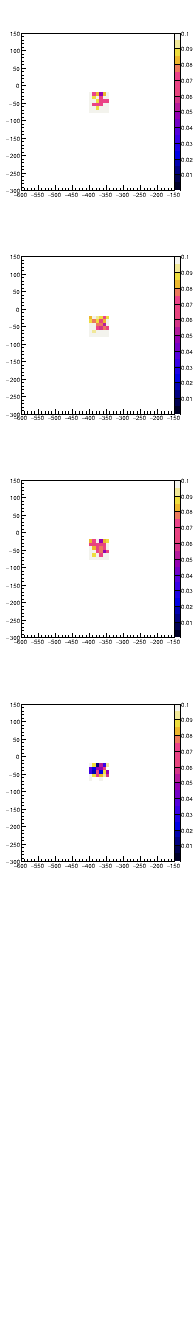

In [99]:
%jsroot off
canvas0 = ROOT.TCanvas("canvas0", "Canvas", 200, 1370)
canvas0.Divide(1,6)
ROOT.gStyle.SetPalette(62)
# ROOT.gStyle.SetPalette(53)
for n_ntime,ntime in enumerate(ntimes):
    for i in range(len(conds)):
        if(i==6):
            canvas0.cd(n_ntime+1).SetLogz(0)
            hists[n_ntime][i].Draw("colz")
            hists[n_ntime][i].SetMaximum(0.1)
            hists[n_ntime][i].SetMinimum(0.0001)
            # hists[n_ntime][i].SetMaximum(0.07)
canvas0.Draw()

In [65]:
# lists=save_canvas_to_pdf_withhardness(ntimes,hists,conds,legends,tree,tree2,dts)
# calc_ratio_error(lists)

TypeError: save_canvas_to_pdf_withhardness() missing 1 required positional argument: 'cond22'

In [66]:
ROOT.gStyle.SetPalette(62)
# ROOT.gStyle.SetPalette(53)

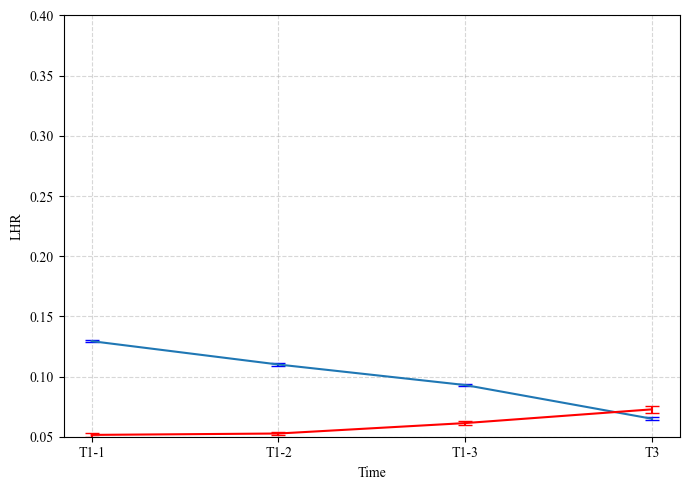

In [102]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
# X 軸ラベル
labels = ["T1-1", "T1-2", "T1-3", "T3"]

# X 軸上のプロット位置 (0,1,2,3) として定義
x = np.arange(len(R))  # [0,1,2,3]
# LHR
R1=[0.12941009776602277, 0.10999370499454944, 0.09293759721059018, 0.0649293164024677]
err1=[0.0010726130878984893, 0.0009681336210359926, 0.0009316965564089516, 0.0013830716430887303]
R2=[0.05151351836881344, 0.052666151468315305, 0.06133591481122943, 0.07273736812881733]
err2=[0.0015597210535294244, 0.0014636221896968703, 0.0015876826130086406, 0.0026871568339049846]
#HHR

# R1=[0.09914841849148419, 0.0910106085985483, 0.08211494252873563, 0.05919854280510018]
# err1=[0.002574661617395659, 0.002632495937344605, 0.0028584668556096895, 0.005343527240282823]
# R2=[0.2524964336661912, 0.24126637554585154, 0.24585876198779424, 0.3502824858757062]
# err2= [0.02124011501833078, 0.018081445999331154, 0.016341636341590964, 0.036552736678944514]

plt.figure(figsize=(7,5))
# 誤差バー付きで散布図のようにプロット
plt.errorbar(
    x,          # X 座標
    R1,          # Y 座標 (計算結果)
    yerr=err1,   # Y の誤差
    fmt='-',    # マーカーを 'o' に
    capsize=5,  # 誤差バーの端の「横棒」の長さ
    ecolor='blue',  # 誤差バーの色（例）
    label="Main Loop"
)
plt.errorbar(
    x,          # X 座標
    R2,          # Y 座標 (計算結果)
    yerr=err2,   # Y の誤差
    fmt='-',    # マーカーを 'o' に
    capsize=5,  # 誤差バーの端の「横棒」の長さ
    color='red',  # 誤差バーの色（例）
    ecolor='red',  # 誤差バーの色（例）
    label="Fainter Loop"
)
plt.ylim(0.05,0.4)
# X 軸ラベルを設定
plt.xticks(x, labels)

# 軸ラベルやタイトルなど（必要に応じて）
plt.xlabel("Time")    # X軸ラベル (任意)
plt.ylabel("LHR")     # Y軸ラベル (任意)
# plt.title("Plot of R_i with Error Bars")  # タイトル (任意)

# グリッドを付けたい場合は下記のように
plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [78]:
import math
def calc_ratio_error(lists):
    # ----------- 入力データ -----------
    A = lists[0]#[127038.0, 130262.0, 117014.0, 36147.0]
    B =  lists[1]#[16440.0, 14328.0, 10875.0, 2347.0]
    C =  lists[2]#[36, 36, 36, 36]

    # ラベル（必要に応じて変えてください）
    labels = ["T1-1", "T1-2", "T1-3", "T3"]

    # ----------- 計算 -----------
    R = []
    err_R = []

    for i in range(len(A)):
        # A_i, B_i のガウシアンエラー（Poisson を想定）
        sigma_Ai = math.sqrt(A[i])   # sqrt(A_i)
        sigma_Bi = math.sqrt(B[i])   # sqrt(B_i)
        
        # まず比 r_i = A_i / B_i
        r_i = B[i] / A[i]
        
        # r_i の誤差伝搬: σ_r = r * sqrt( (σ_A / A)^2 + (σ_B / B)^2 )
        sigma_ri = r_i * math.sqrt( (sigma_Ai/A[i])**2 + (sigma_Bi/B[i])**2 )
        
        # 最後に C_i で割って R_i = r_i / C_i
        R_i = r_i #/ C[i]
        sigma_Ri = sigma_ri #/ C[i]
        
        R.append(R_i)
        err_R.append(sigma_Ri)
    return R, err_R
